In [107]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [108]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex, game_names, use_game=False):

    game_tag = "_game_I_" if use_game else "_facet_I_"

    opt_dicts = []
    for game_name in game_names:


        file_regex = resource_regex + game_tag + game_name + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## Data Analysis

In [114]:
int_data_path = "../data/interference_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"qint", game_names)
eatx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"eatx_qint", game_names)
earx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"earx_qint", game_names)

qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"qint", game_names, use_game=True)
eatx_qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"eatx_qint", game_names, use_game=True)
earx_qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"earx_qint", game_names, use_game=True)

int2_data_path = "../data/interference2_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"qint", game_names)
eatx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"eatx_qint", game_names)
earx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"earx_qint", game_names)

qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"qint", game_names, use_game=True)
eatx_qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"eatx_qint", game_names, use_game=True)
earx_qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"earx_qint", game_names, use_game=True)

bf_data_path = "../data/butterfly_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf", game_names)
eatx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"eatx_qbf", game_names)
earx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"earx_qbf", game_names)

mac_data_path = "../data/mac_33_9_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]
qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"qmac", game_names)
eatx_qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"eatx_qmac", game_names)

bc_data_path = "../data/broadcast_9_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]
qbc_facet_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"qbc", game_names)
earx_qbc_facet_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"earx_qbc", game_names)




## Analyzing Data

In [115]:
interference_game_inequalities, interference_facet_inequalities, interference_game_names = mac.interference_33_33_network_bounds()
interference2_game_inequalities, interference2_facet_inequalities, interference2_game_names = mac.interference2_33_33_network_bounds()
butterfly_game_inequalities, butterfly_facet_inequalities, butterfly_game_names = mac.butterfly_33_33_network_bounds()
mac_game_inequalities, mac_facet_inequalities, mac_game_names = mac.mac_33_22_9_network_bounds()
bc_game_inequalities, bc_facet_inequalities, bc_game_names = mac.broadcast_9_22_33_network_bounds()



def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(9):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]

        max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound)/ (qbound - cbound)]
        

    return max_violations, qbounds, cbounds

print(interference_game_names)
qint_facet_max_violations, qint_facet_qbounds, qint_facet_cbounds = analyze_data(qint_facet_opt_dicts, interference_facet_inequalities)
eatx_qint_facet_max_violations, eatx_qint_facet_qbounds, eatx_qint_facet_cbounds = analyze_data(eatx_qint_facet_opt_dicts, interference_facet_inequalities)
earx_qint_facet_max_violations, earx_qint_facet_qbounds, earx_qint_facet_cbounds = analyze_data(earx_qint_facet_opt_dicts, interference_facet_inequalities)

qint_game_max_violations, qint_game_qbounds, qint_game_cbounds = analyze_data(qint_game_opt_dicts, interference_game_inequalities)
eatx_qint_game_max_violations, eatx_qint_game_qbounds, eatx_qint_game_cbounds = analyze_data(eatx_qint_game_opt_dicts, interference_game_inequalities)
earx_qint_game_max_violations, earx_qint_game_qbounds, earx_qint_game_cbounds = analyze_data(earx_qint_game_opt_dicts, interference_game_inequalities)


qint2_facet_max_violations, qint2_facet_qbounds, qint2_facet_cbounds = analyze_data(qint2_facet_opt_dicts, interference2_facet_inequalities)
eatx_qint2_facet_max_violations, eatx_qint2_facet_qbounds, eatx_qint2_facet_cbounds = analyze_data(eatx_qint2_facet_opt_dicts, interference2_facet_inequalities)
earx_qint2_facet_max_violations, earx_qint2_facet_qbounds, earx_qint2_facet_cbounds = analyze_data(earx_qint2_facet_opt_dicts, interference2_facet_inequalities)

qint2_game_max_violations, qint2_game_qbounds, qint2_game_cbounds = analyze_data(qint2_game_opt_dicts, interference2_game_inequalities)
eatx_qint2_game_max_violations, eatx_qint2_game_qbounds, eatx_qint2_game_cbounds = analyze_data(eatx_qint2_game_opt_dicts, interference2_game_inequalities)
earx_qint2_game_max_violations, earx_qint2_game_qbounds, earx_qint2_game_cbounds = analyze_data(earx_qint2_game_opt_dicts, interference2_game_inequalities)



qbf_facet_max_violations, qbf_facet_qbounds, qbf_facet_cbounds = analyze_data(qbf_facet_opt_dicts,  butterfly_facet_inequalities)
eatx_qbf_facet_max_violations, eatx_qbf_facet_qbounds, eatx_qbf_facet_cbounds = analyze_data(eatx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)
earx_qbf_facet_max_violations, earx_qbf_facet_qbounds, earx_qbf_facet_cbounds = analyze_data(earx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)

qmac_facet_max_violations, qmac_facet_qbounds, qmac_facet_cbounds = analyze_data(qmac_facet_opt_dicts, mac_facet_inequalities)
eatx_qmac_facet_max_violations, eatx_qmac_facet_qbounds, eatx_qmac_facet_cbounds = analyze_data(eatx_qmac_facet_opt_dicts, mac_facet_inequalities)


qbc_facet_max_violations, qbc_facet_qbounds, qbc_facet_cbounds = analyze_data(qbc_facet_opt_dicts, bc_facet_inequalities)
earx_qbc_facet_max_violations, earx_qbc_facet_qbounds, earx_qbc_facet_cbounds = analyze_data(earx_qbc_facet_opt_dicts, bc_facet_inequalities)



['mult0', 'mult1', 'swap', 'adder', 'compare', 'perm', 'diff', 'cv']


In [111]:
x_axis = np.arange(len(interference_game_names))
x_labels = interference_game_names
x_labels = ["Mult-0", "Mult-1", "Swap", "Add", "Comp", "Perm", "Diff", "CV"]
x_labels_games = [
    r"$\mathbf{G}^{\times_0}$",
    r"$\mathbf{G}^{\times_1}$",
    r"$\mathbf{G}^{\leftrightarrow}$",
    r"$\mathbf{G}^{+}$",
    r"$\mathbf{G}^{\gtrless}$",
    r"$\mathbf{G}^{\pi}$",
    r"$\mathbf{G}^{-}$",
    r"$\mathbf{G}^{\rm{CV}}$",
]
x_labels_facets = [
    r"$\widehat{\mathbf{G}}^{\times_0}$",
    r"$\widehat{\mathbf{G}}^{\times_1}$",
    r"$\widehat{\mathbf{G}}^{\leftrightarrow}$",
    r"$\widehat{\mathbf{G}}^{+}$",
    r"$\widehat{\mathbf{G}}^{\gtrless}$",
    r"$\widehat{\mathbf{G}}^{\pi}$",
    r"$\widehat{\mathbf{G}}^{-}$",
    r"$\widehat{\mathbf{G}}^{\rm{CV}}$",
]


0.9999370203904911
[tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True)]
[7, 5, 4, 5, 6, 4, 7, 4]


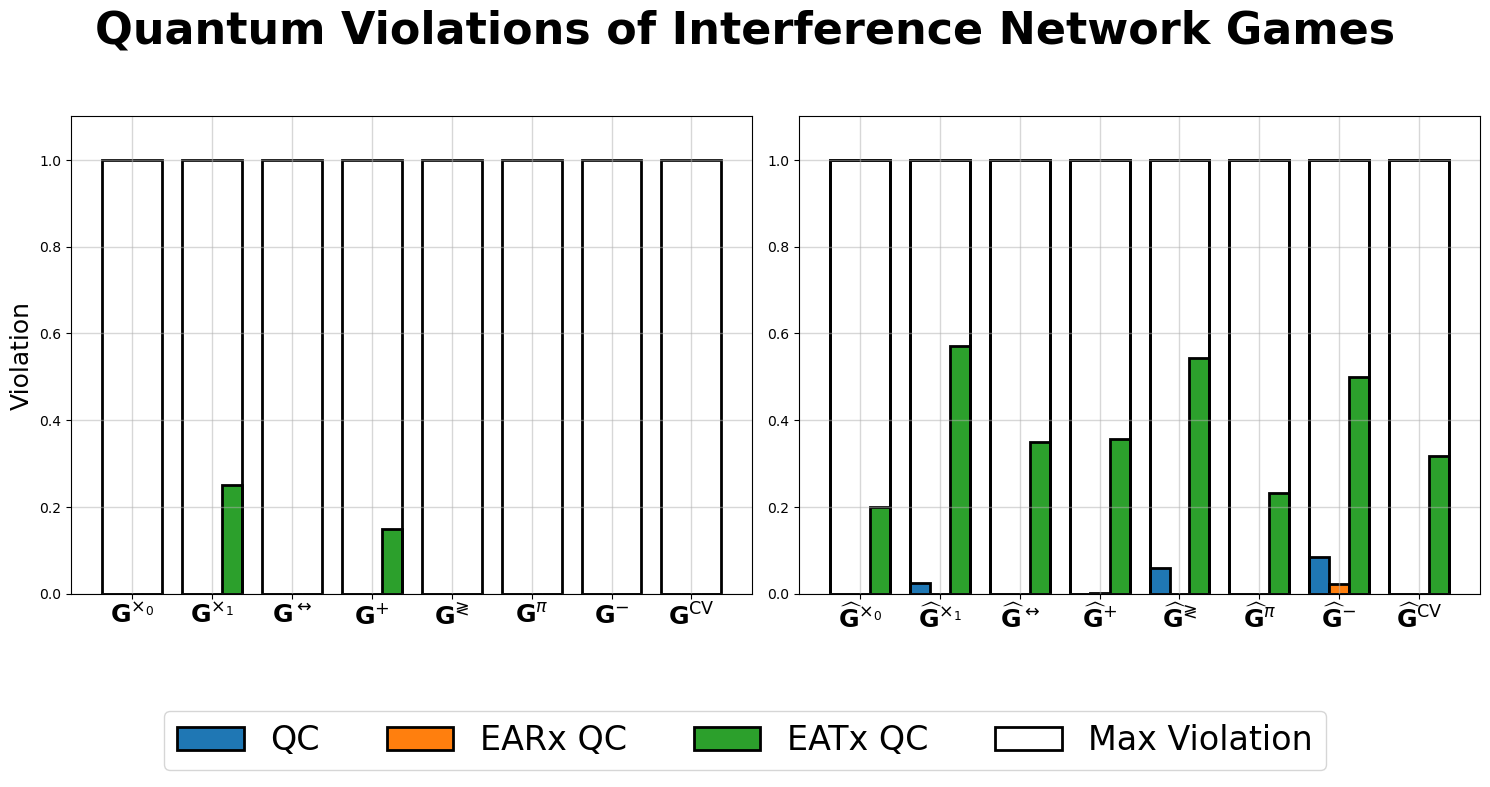

In [112]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)

print(eatx_qint_game_max_violations[1]*4)
print(eatx_qint_game_qbounds)
print(eatx_qint_game_cbounds)


ax1.bar(x_axis-1*width, qint_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qint_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qint_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qint_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qint_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Interference Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

-1.6553123280615976e-05
[tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True), tensor(9., requires_grad=True)]
[7, 4, 2, 5, 6, 2, 7, 2]


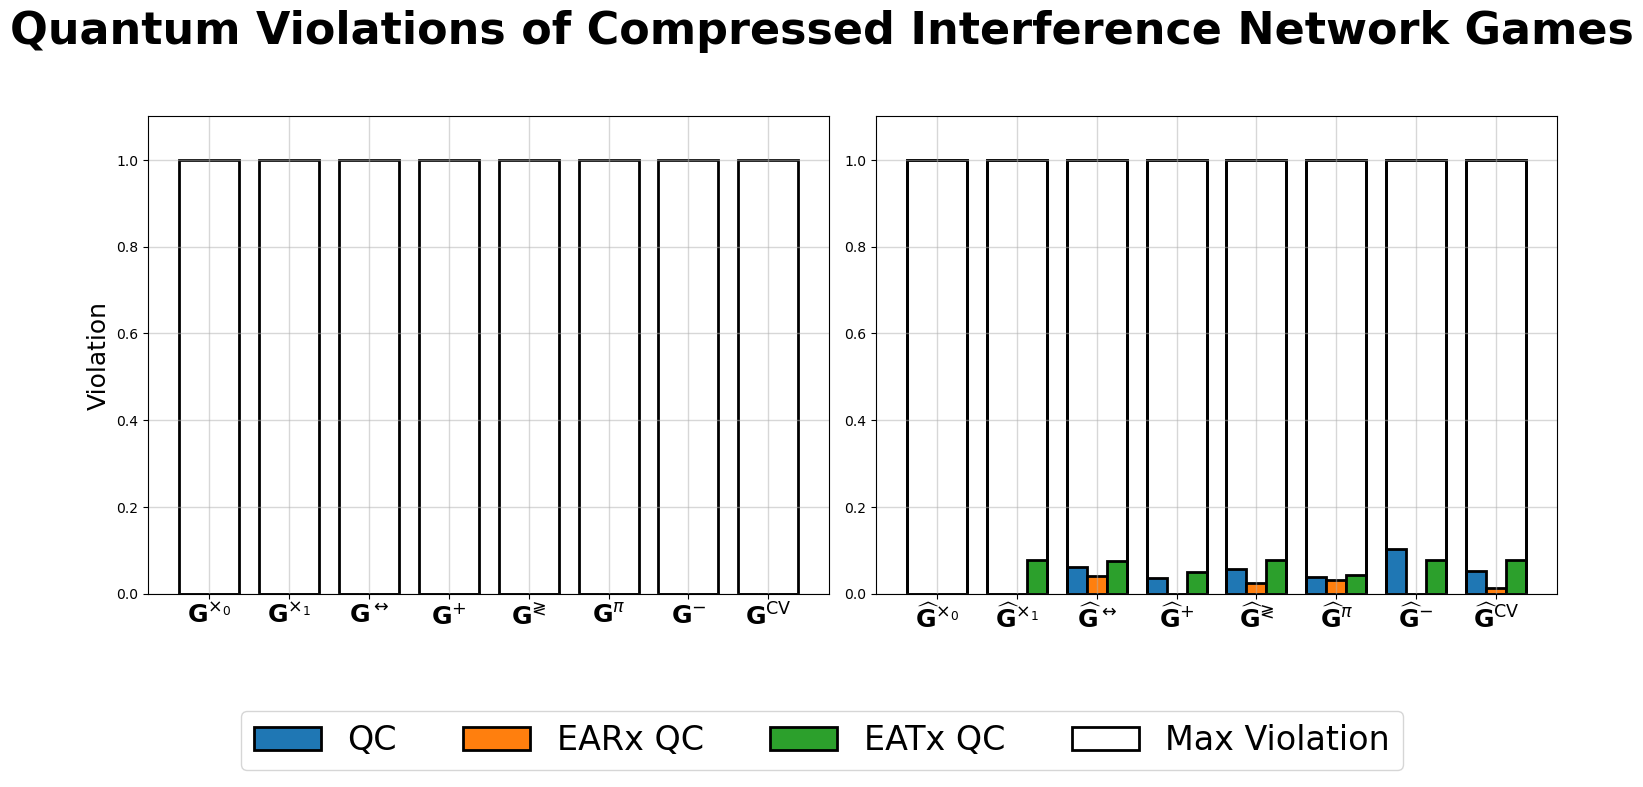

In [116]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)

print(eatx_qint2_game_max_violations[1]*4)
print(eatx_qint2_game_qbounds)
print(eatx_qint2_game_cbounds)


ax1.bar(x_axis-1*width, qint2_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qint2_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qint2_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qint2_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qint2_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qint2_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Compressed Interference Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

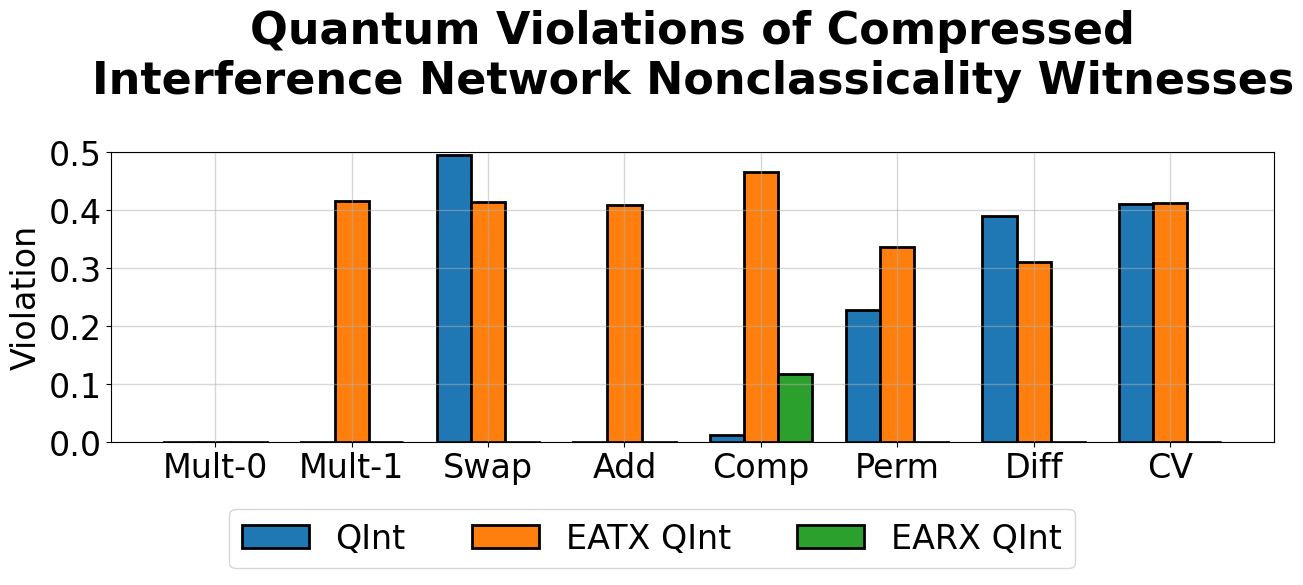

In [59]:
x_axis = np.arange(len(interference2_game_names))
x_labels = interference2_game_names
x_labels = ["Mult-0", "Mult-1", "Swap", "Add", "Comp", "Perm", "Diff", "CV"]

width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qint2_facet_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, eatx_qint2_facet_max_violations, width=width, label="EATX QInt", edgecolor="black",linewidth=2)
plt.bar(x_axis+1*width, earx_qint2_facet_max_violations, width=width, label="EARX QInt", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qint_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of Compressed\nInterference Network Nonclassicality Witnesses\n", size=32, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)
plt.ylim([0,0.5])

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()

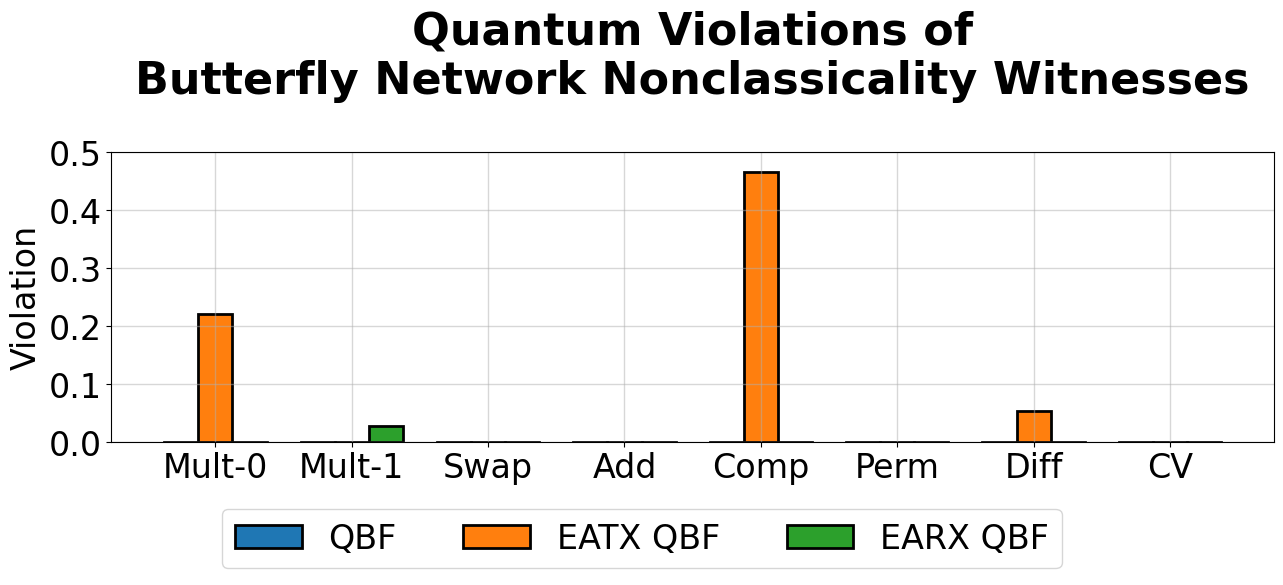

In [63]:
x_axis = np.arange(len(butterfly_game_names))
x_labels = butterfly_game_names
x_labels = ["Mult-0", "Mult-1", "Swap", "Add", "Comp", "Perm", "Diff", "CV"]
width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qbf_facet_max_violations, width=width, label="QBF", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, eatx_qbf_facet_max_violations, width=width, label="EATX QBF", edgecolor="black",linewidth=2)
plt.bar(x_axis+1*width, earx_qbf_facet_max_violations, width=width, label="EARX QBF", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qint_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of\nButterfly Network Nonclassicality Witnesses\n", size=32, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)
plt.ylim([0,0.5])

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()

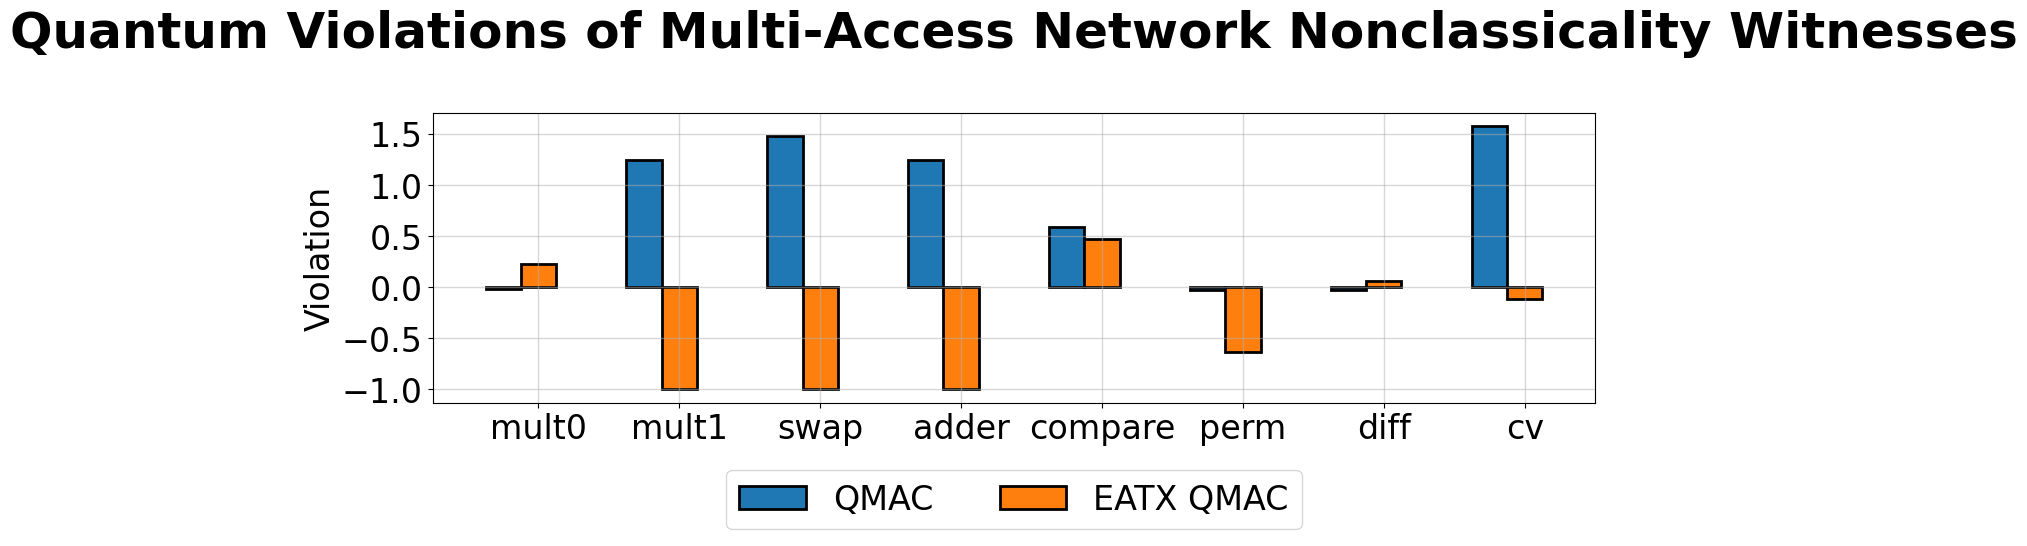

In [18]:
x_axis = np.arange(len(mac_game_names))
x_labels = mac_game_names
width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qmac_facet_max_violations, width=width, label="QMAC", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, eatx_qbf_facet_max_violations, width=width, label="EATX QMAC", edgecolor="black",linewidth=2)
# plt.bar(x_axis+1*width, earx_qbf_facet_max_violations, width=width, label="EARX QBF", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qmac_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of Multi-Access Network Nonclassicality Witnesses\n", size=36, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()

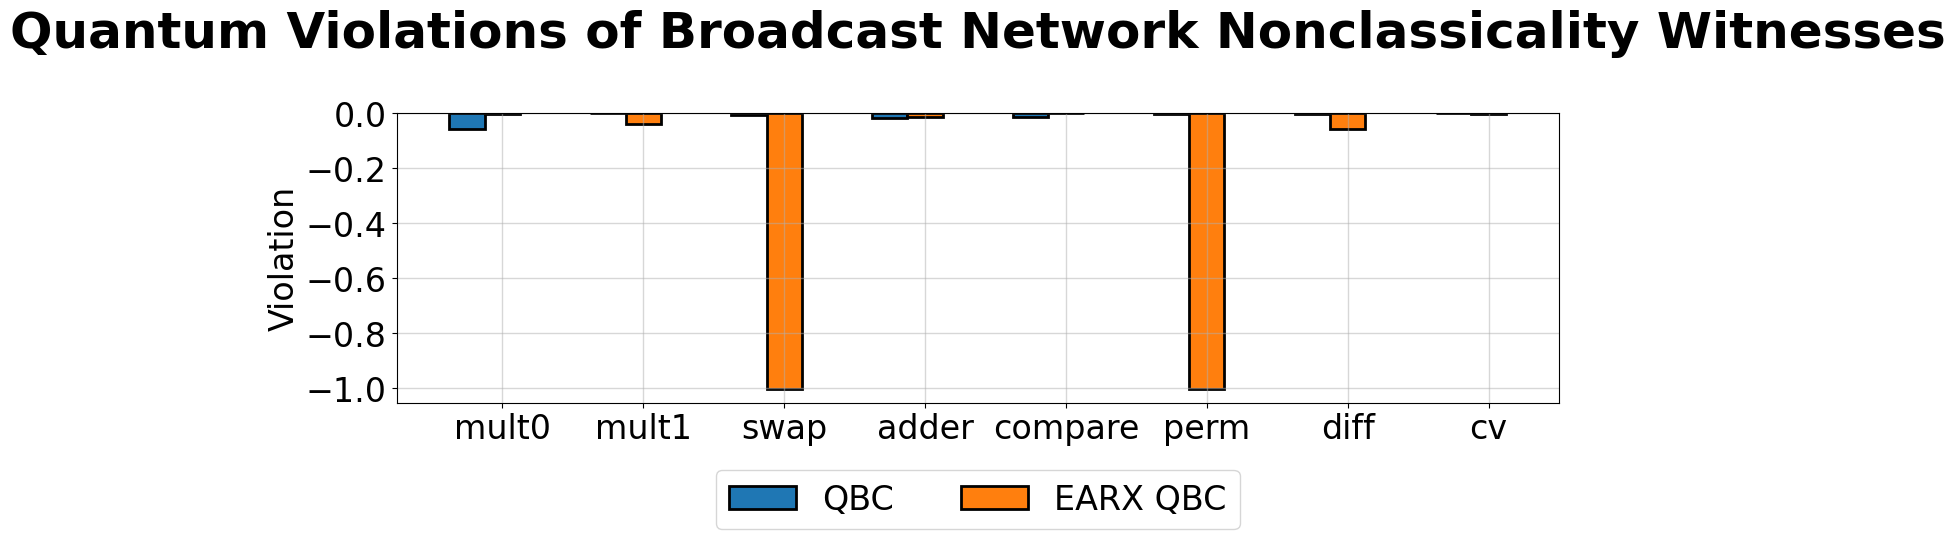

In [16]:
x_axis = np.arange(len(bc_game_names))
x_labels = bc_game_names
width = 1/4

fig = plt.figure(figsize=(15, 5))
plt.grid(linewidth=1, alpha=0.5)



plt.bar(x_axis-1*width, qbc_facet_max_violations, width=width, label="QBC", edgecolor="black",linewidth=2)
plt.bar(x_axis-0*width, earx_qbc_facet_max_violations, width=width, label="EARX QBC", edgecolor="black",linewidth=2)
# plt.bar(x_axis+1*width, earx_qbf_facet_max_violations, width=width, label="EARX QBF", edgecolor="black",linewidth=2)

# plt.bar(x_axis+0*width, qmac_facet_qbounds, width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)



plt.xticks(x_axis, x_labels, fontsize=24)
plt.title("Quantum Violations of Broadcast Network Nonclassicality Witnesses\n", size=36, fontweight="bold")
plt.yticks(fontsize=24)
plt.ylabel("Violation", fontsize=24)
# plt.legend(fontsize=20, ncol=3)

plt.figlegend(loc="lower center", ncols = 6, fontsize=24)
plt.subplots_adjust(bottom=0.3)

plt.show()